# 16

In [470]:
array = []

with open("input.txt") as file: 
    for line in file: 
        array.append(line.strip())



In [471]:
for row in range(len(array)):
    for col in range(len(array[row])):
        
        if array[row][col] == "S":
            start = (row, col)
        elif array[row][col] == "E":
            end = (row, col)

start

(139, 1)

In [472]:
from heapq import heappush, heappop
 
# Use heap for this as (score, node, faces) pairs. 
current = [(0, start, "E")] 

MAX_COST = 1_000
MAX_DISTANCE = len(array) * len(array[0]) * MAX_COST

# Store the distances here. 
distances = [[MAX_DISTANCE for _ in range(len(array[0]))] for _ in range(len(array))]
distances[start[0]][start[1]] = 0

# Dijskras algorithm.
while len(current) > 0: 
    distance, node, faces = heappop(current)

    # Insert new neighbor
    neighbors = {"S": (node[0] + 1, node[1]), 
                 "N": (node[0] - 1, node[1]), 
                 "E": (node[0], node[1] + 1), 
                 "W": (node[0], node[1] - 1)}  # R -> rotat
    
    for direction, neighbor in neighbors.items():

        # Out of bounds
        if neighbor[0] < 0 or neighbor[0] >= len(array) or neighbor[1] < 0 or neighbor[1] >= len(array[0]):
            continue

        # Wall
        if array[neighbor[0]][neighbor[1]] == "#":
            continue

        cost = 1
        # Compute cost. If changing direction, add 1000 to cost (can only change direction by 90 degrees)
        if faces != direction:
            cost += 1000
            # TODO: how to achieve this with a heappush at the same location, but different direction?
            #distances[neighbor[0]][neighbor[1]] += 1000
   
        # Add new path
        if distance + cost < distances[neighbor[0]][neighbor[1]]:
            distances[neighbor[0]][neighbor[1]] = distance + cost
            heappush(current, (distance + cost, neighbor, direction))

In [473]:
distances[end[0]][end[1]]  # off by one error? 

93436

In [474]:
import numpy as np

(-0.5, 140.5, 140.5, -0.5)

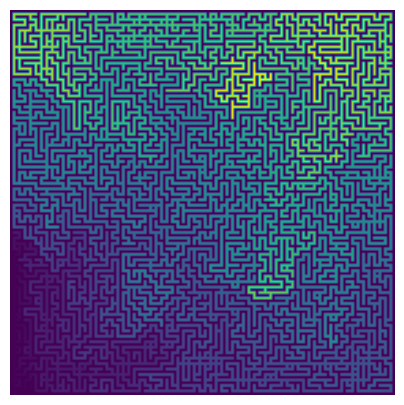

In [475]:
import matplotlib.pyplot as plt

result = np.array(distances)
result[result == MAX_DISTANCE] = -1

plt.figure(figsize=(5, 5))
plt.imshow(result)
plt.axis("off")


# 2

In [ ]:
print_array = [list(line) for line in array]

neighbors = {(1,0):(end[0] + 1, end[1]), 
             (-1,0):(end[0] - 1, end[1]), 
             (0,1):(end[0], end[1] + 1), 
             (0,-1):(end[0], end[1] - 1)}

to_visit = [] 
for direction, neighbor in neighbors.items():
    if neighbor[0] < 0 or neighbor[0] >= len(array) or neighbor[1] < 0 or neighbor[1] >= len(array[0]):
        continue

    if distances[neighbor[0]][neighbor[1]] == distances[end[0]][end[1]] - 1:
        to_visit.append((end, direction))
    if distances[neighbor[0]][neighbor[1]] == distances[end[0]][end[1]] - 1001:
        to_visit.append((end, direction))


num_steps = 0 

while len(to_visit) > 0:
    node, faces = to_visit.pop()  

    print(node, faces)

    if print_array[node[0]][node[1]] != "X":
         num_steps += 1

    print_array[node[0]][node[1]] = "X"

    neighbors = {(1,0):(node[0] + 1, node[1]), 
                (-1,0):(node[0] - 1, node[1]), 
                (0,1):(node[0], node[1] + 1), 
                (0,-1):(node[0], node[1] - 1)}
    
    for direction, neighbor in neighbors.items():
        if neighbor[0] < 0 or neighbor[0] >= len(array) or neighbor[1] < 0 or neighbor[1] >= len(array[0]):
            continue

        if array[neighbor[0]][neighbor[1]] == "#":
            continue

        #if print_array[neighbor[0]][neighbor[1]] == "X":
        #    break
        
        # Did not change direction 
        if distances[neighbor[0]][neighbor[1]] == distances[node[0]][node[1]] - 1:
            to_visit.append((neighbor, direction))

        # Did change direction
        if distances[neighbor[0]][neighbor[1]] == distances[node[0]][node[1]] - 1001:
            to_visit.append((neighbor, direction))

            # take an extra step and check if you have correct weight
            next_neighbor = (neighbor[0] + direction[0], neighbor[1] + direction[1])
            print("FORKED")
            print(f"NN DIST: {distances[neighbor[0]+direction[0]][neighbor[1]+direction[1]]}, NODE: {distances[node[0]][node[1]]}" )

            if distances[neighbor[0]+direction[0]][neighbor[1]+direction[1]] == distances[node[0]][node[1]] - 2:
                print("CORRECT")
                to_visit.append((next_neighbor, direction)) # Forks 

        print(to_visit)

        




    

(1, 139) (1, 0)
[((2, 139), (1, 0))]
[((2, 139), (1, 0))]
(2, 139) (1, 0)
FORKED
NN DIST: 19881000, NODE: 93435
[((3, 139), (1, 0))]
[((3, 139), (1, 0))]
(3, 139) (1, 0)
[]
[((3, 138), (0, -1))]
(3, 138) (0, -1)
[]
FORKED
NN DIST: 19881000, NODE: 92433
[((3, 137), (0, -1))]
(3, 137) (0, -1)
[((4, 137), (1, 0))]
[((4, 137), (1, 0))]
(4, 137) (1, 0)
[((5, 137), (1, 0))]
[((5, 137), (1, 0))]
(5, 137) (1, 0)
[((6, 137), (1, 0))]
[((6, 137), (1, 0))]
[((6, 137), (1, 0))]
(6, 137) (1, 0)
[((7, 137), (1, 0))]
[((7, 137), (1, 0))]
(7, 137) (1, 0)
[((8, 137), (1, 0))]
[((8, 137), (1, 0))]
[((8, 137), (1, 0))]
(8, 137) (1, 0)
[((9, 137), (1, 0))]
[((9, 137), (1, 0))]
(9, 137) (1, 0)
[((10, 137), (1, 0))]
[((10, 137), (1, 0))]
[((10, 137), (1, 0))]
(10, 137) (1, 0)
[((11, 137), (1, 0))]
[((11, 137), (1, 0))]
(11, 137) (1, 0)
[((12, 137), (1, 0))]
[((12, 137), (1, 0))]
[((12, 137), (1, 0))]
(12, 137) (1, 0)
[((13, 137), (1, 0))]
[((13, 137), (1, 0))]
(13, 137) (1, 0)
[((14, 137), (1, 0))]
[((14, 1

In [477]:
result = 0
display = [[MAX_DISTANCE for _ in range(len(array[0]))] for _ in range(len(array))]

for row in range(len(print_array)):
    for col in range(len(print_array[0])):
        if print_array[row][col] == "X":
            display[row][col] = 1
            result += 1
        elif print_array[row][col] == "#":
            display[row][col] = -1
        elif print_array[row][col] == "F":
            display[row][col] = 2
        else:
            display[row][col] = 0
        
        

Text(0, -30, 'Result: 486')

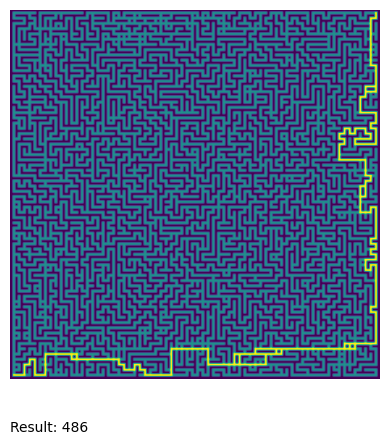

In [478]:
plt.imshow(display)
plt.axis("off");
plt.annotate(f"Result: {result}", (0, 0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top')